### Curso: CC521 A Programación Evolutiva 2022-1
Alumno: Jordi Joel Bardales Rojas

# Práctica dirigida: Representación y Selección 


In [7]:
from __future__ import annotations
import math
import numpy as np
from enum import Enum
from bin_repr import dec2bin, bin2gray, my_map, inverse_map, bin2dec, gray2bin
import copy
import random 
import matplotlib.pyplot as plt
from typing import Callable,  NamedTuple
from itertools import combinations
from abc import ABC, abstractmethod

class Representation(Enum):
    BIN = 0
    GRAY = 1
    DECIMAL = 2

# Problemas de optimización
Este laboratorio se mostrará varios métodos de selección como la selección proporcional, ranking lineal, torneo, uniforme y selección ruleta, luego se medirá la intensidad de selección en un problema de minimización.


## 1. Dado los siguientes problemas de minimización de una función $\min_\mathbf{x}f(\mathbf{x})$


In [8]:
f1 = lambda x: x[0]**4 + 5*x[0]**3 + 4*x[0]**2 - 4*x[0] + 1
f2 = lambda x: 0.2 + x[0]**2 + x[1]**2 - 0.1*math.cos(6*math.pi*x[0]) - 0.1*math.sin(6*math.pi*x[1])
f3 = lambda x: math.pow(1/6.931 - x[0]*x[1]/(x[2]*x[3]), 2)


Dominio

In [9]:
domain_1, n_var_1 = [-4.0, 1], 1
domain_2, n_var_2 = [-1, 1.0], 2
domain_3, n_var_3 = [12, 60.], 4


Parámetros del individuo tipados

In [10]:
class IndividualArguments(NamedTuple):
    domain: tuple[int, int]
    eps: float
    n_var: int
    gen_size: int
    default_repr: Representation = Representation.DECIMAL

Clase individuo 

In [11]:
class Individual():
    def __init__(self, phenotype: list[float], args: IndividualArguments):
        self.domain = args.domain
        self.eps = args.eps
        self.n_var = args.n_var
        self.gen_size = args.gen_size
        self.default_repr = args.default_repr
        self.phenotype = phenotype

    def getGenotype(self, my_repr: Representation = None):
        my_repr = self.default_repr if my_repr == None else my_repr
        list_repr: list[int] = []
        if my_repr == Representation.BIN:
            for gen in self.phenotype:
                list_repr.extend(dec2bin(num=my_map(gen, self.domain[0], self.domain[1], self.eps), bits=self.gen_size))
        elif my_repr == Representation.GRAY:
            for gen in self.phenotype:
                list_repr.extend(bin2gray(dec2bin(num=my_map(gen, self.domain[0], self.domain[1], self.eps), bits=self.gen_size)))
        else:
            list_repr = copy.deepcopy(self.phenotype)
        return list_repr

    @classmethod
    def new(cls, genotype, args: IndividualArguments):
        phenotype: list[int] = []
        if args.default_repr == Representation.BIN:
            for k in range(args.n_var):
                gen = genotype[args.gen_size * k:args.gen_size * (k + 1)]
                phenotype.append(inverse_map(bin2dec(gen), args.domain[0], args.eps))
        elif args.default_repr == Representation.GRAY:
            for k in range(args.n_var):
                gen = genotype[args.gen_size * k:args.gen_size * (k + 1)]
                phenotype.append(inverse_map(bin2dec(gray2bin(gen)), args.domain[0], args.eps))
        else:
            phenotype = copy.deepcopy(genotype)
        
        return cls(phenotype, args)

    @staticmethod
    def newLike(genotype: list[int], parent: Individual):
        args = IndividualArguments(parent.domain, parent.eps, parent.n_var, parent.gen_size, parent.default_repr)
        return Individual.new(genotype, args)

    @classmethod
    def newRandom(cls, args: IndividualArguments):
        phenotype = [round(random.uniform(args.domain[0], args.domain[1]), 6) for _ in range(args.n_var)]
        return cls(phenotype, args)


### a) Representación del problema (1)
Implemente un programa en python que represente el cromosoma como una cadena binaria de 10 dígitos (10 bits) y muestre/imprima el Fenotipo y su representación binaria para una población de 10 individuos.

In [12]:
POPULATION_SIZE = 10
GEN_SIZE_1 = 10
eps_1 = (domain_1[1] - domain_1[0]) / (2**GEN_SIZE_1 - 1)
N_POINTS_1 = 2**GEN_SIZE_1

args1 = IndividualArguments(domain_1, eps_1, n_var_1, GEN_SIZE_1, f1)

population_1 = [Individual.newRandom(args1) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_1):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")


Representación binaria
Genotipo 0 = [1, 0, 1, 0, 1, 1, 0, 1, 0, 0] Fenotipo 0 = [-0.619152]
Genotipo 1 = [1, 1, 1, 0, 1, 0, 0, 0, 0, 1] Fenotipo 1 = [0.541534]
Genotipo 2 = [0, 0, 1, 1, 1, 1, 0, 0, 1, 1] Fenotipo 2 = [-2.814198]
Genotipo 3 = [1, 0, 0, 0, 0, 0, 0, 1, 1, 1] Fenotipo 3 = [-1.462353]
Genotipo 4 = [0, 0, 1, 1, 0, 1, 1, 0, 0, 0] Fenotipo 4 = [-2.945017]
Genotipo 5 = [1, 0, 1, 0, 0, 0, 1, 1, 1, 1] Fenotipo 5 = [-0.800241]
Genotipo 6 = [1, 0, 1, 1, 0, 1, 1, 1, 0, 1] Fenotipo 6 = [-0.414969]
Genotipo 7 = [1, 0, 0, 1, 0, 1, 1, 0, 0, 1] Fenotipo 7 = [-1.064885]
Genotipo 8 = [1, 0, 1, 1, 0, 0, 0, 0, 1, 0] Fenotipo 8 = [-0.550906]
Genotipo 9 = [0, 1, 1, 1, 1, 0, 0, 0, 1, 0] Fenotipo 9 = [-1.64276]


Realizar lo mismo del ítem anterior para la representación en código de Gray.

In [13]:
print("Representación en código Gray")
for i, ind in enumerate(population_1):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Representación en código Gray
Genotipo 0 = [1, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fenotipo 0 = [-0.619152]
Genotipo 1 = [1, 0, 0, 1, 1, 1, 0, 0, 0, 1] Fenotipo 1 = [0.541534]
Genotipo 2 = [0, 0, 1, 0, 0, 0, 1, 0, 1, 0] Fenotipo 2 = [-2.814198]
Genotipo 3 = [1, 1, 0, 0, 0, 0, 0, 1, 0, 0] Fenotipo 3 = [-1.462353]
Genotipo 4 = [0, 0, 1, 0, 1, 1, 0, 1, 0, 0] Fenotipo 4 = [-2.945017]
Genotipo 5 = [1, 1, 1, 1, 0, 0, 1, 0, 0, 0] Fenotipo 5 = [-0.800241]
Genotipo 6 = [1, 1, 1, 0, 1, 1, 0, 0, 1, 1] Fenotipo 6 = [-0.414969]
Genotipo 7 = [1, 1, 0, 1, 1, 1, 0, 1, 0, 1] Fenotipo 7 = [-1.064885]
Genotipo 8 = [1, 1, 1, 0, 1, 0, 0, 0, 1, 1] Fenotipo 8 = [-0.550906]
Genotipo 9 = [0, 1, 0, 0, 0, 1, 0, 0, 1, 1] Fenotipo 9 = [-1.64276]


Considerando las representaciones anteriores (cadena de 10 bits) ¿cual sería el tamaño del espacio intrínseco?


In [14]:
print(f"El espacio intrinseco tendría {N_POINTS_1} elementos con una precisión de {eps_1}")

El espacio intrinseco tendría 1024 elementos con una precisión de 0.004887585532746823


### b) Representación del problema (2):

Implemente un programa en python que represente el cromosoma como una cadena binaria donde $x, y$ estén representados por 5 bits cada uno y luego muestre/imprima el Fenotipo y su
representación binaria.

In [15]:
POPULATION_SIZE = 10
GEN_SIZE_2 = 5
eps_2 = (domain_2[1] - domain_2[0]) / (2**GEN_SIZE_2 - 1)
N_POINTS_2 = 2**GEN_SIZE_2

args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, f2)

population_2 = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_2):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")

Representación binaria
Genotipo 0 = [0, 0, 1, 1, 1, 0, 0, 1, 0, 0] Fenotipo 0 = [-0.547581, -0.717762]
Genotipo 1 = [0, 0, 1, 1, 0, 1, 0, 1, 0, 0] Fenotipo 1 = [-0.600533, 0.300297]
Genotipo 2 = [1, 1, 0, 0, 0, 1, 1, 1, 0, 1] Fenotipo 2 = [0.53053, 0.875988]
Genotipo 3 = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0] Fenotipo 3 = [-0.294898, -0.98418]
Genotipo 4 = [1, 1, 0, 0, 1, 1, 0, 1, 0, 1] Fenotipo 4 = [0.59171, 0.324772]
Genotipo 5 = [0, 0, 0, 1, 0, 1, 0, 0, 0, 0] Fenotipo 5 = [-0.902145, 0.033326]
Genotipo 6 = [1, 0, 1, 1, 1, 1, 1, 1, 1, 0] Fenotipo 6 = [0.470669, 0.961173]
Genotipo 7 = [0, 1, 0, 0, 1, 1, 0, 1, 0, 1] Fenotipo 7 = [-0.436322, 0.369259]
Genotipo 8 = [1, 0, 1, 0, 0, 0, 1, 1, 0, 0] Fenotipo 8 = [0.314398, -0.242109]
Genotipo 9 = [1, 1, 0, 0, 1, 1, 0, 0, 1, 0] Fenotipo 9 = [0.59834, 0.167977]


Realizar lo mismo del ítem anterior para la representación en código de Gray

In [16]:
print("Representación en código Gray")
for i, ind in enumerate(population_2):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Representación en código Gray
Genotipo 0 = [0, 0, 1, 0, 0, 0, 0, 1, 1, 0] Fenotipo 0 = [-0.547581, -0.717762]
Genotipo 1 = [0, 0, 1, 0, 1, 1, 1, 1, 1, 0] Fenotipo 1 = [-0.600533, 0.300297]
Genotipo 2 = [1, 0, 1, 0, 0, 1, 0, 0, 1, 1] Fenotipo 2 = [0.53053, 0.875988]
Genotipo 3 = [0, 1, 1, 1, 0, 0, 0, 0, 0, 0] Fenotipo 3 = [-0.294898, -0.98418]
Genotipo 4 = [1, 0, 1, 0, 1, 1, 1, 1, 1, 1] Fenotipo 4 = [0.59171, 0.324772]
Genotipo 5 = [0, 0, 0, 1, 1, 1, 1, 0, 0, 0] Fenotipo 5 = [-0.902145, 0.033326]
Genotipo 6 = [1, 1, 1, 0, 0, 1, 0, 0, 0, 1] Fenotipo 6 = [0.470669, 0.961173]
Genotipo 7 = [0, 1, 1, 0, 1, 1, 1, 1, 1, 1] Fenotipo 7 = [-0.436322, 0.369259]
Genotipo 8 = [1, 1, 1, 1, 0, 0, 1, 0, 1, 0] Fenotipo 8 = [0.314398, -0.242109]
Genotipo 9 = [1, 0, 1, 0, 1, 1, 1, 0, 1, 1] Fenotipo 9 = [0.59834, 0.167977]


Realizar lo mismo del ítem anterior para la representación real

In [17]:
print("Representación real")
for i, ind in enumerate(population_2):
    print(f"Individuo {i} = {ind.phenotype}")

Representación real
Individuo 0 = [-0.547581, -0.717762]
Individuo 1 = [-0.600533, 0.300297]
Individuo 2 = [0.53053, 0.875988]
Individuo 3 = [-0.294898, -0.98418]
Individuo 4 = [0.59171, 0.324772]
Individuo 5 = [-0.902145, 0.033326]
Individuo 6 = [0.470669, 0.961173]
Individuo 7 = [-0.436322, 0.369259]
Individuo 8 = [0.314398, -0.242109]
Individuo 9 = [0.59834, 0.167977]


Considerando las representaciones anteriores (cadena de 10 bits y representación real) ¿cual sería el tamaño del espacio intrínseco?


In [18]:
print(f"El espacio intrinseco tendría {N_POINTS_2} x {N_POINTS_2} = {2**(2*GEN_SIZE_2)} elementos con una precisión de {eps_2}")

El espacio intrinseco tendría 32 x 32 = 1024 elementos con una precisión de 0.06451612903225806


### c) Representación del problema (3):

Implemente un programa en python que represente el cromosoma como una cadena binaria donde $x_1, x_2, x_3, x_4$ estén representados por 6 bits cada uno y luego muestre/imprima el Fenotipo y su representación binaria.


In [19]:
POPULATION_SIZE = 10
GEN_SIZE_3 = 6
eps_3 = (60 - 12) / (2**GEN_SIZE_3 - 1)
N_POINTS_3 = 2**GEN_SIZE_3

args3 = IndividualArguments(domain_3, eps_3, n_var_3, GEN_SIZE_3, f3)

population_3 = [Individual.newRandom(args3) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_3):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")

Representación binaria
Genotipo 0 = [1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0] Fenotipo 0 = [41.90164, 48.939336, 16.823597, 27.424614]
Genotipo 1 = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1] Fenotipo 1 = [52.149393, 25.724696, 15.366023, 28.287665]
Genotipo 2 = [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0] Fenotipo 2 = [27.342968, 23.988219, 33.232471, 57.914686]
Genotipo 3 = [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0] Fenotipo 3 = [47.627457, 57.97664, 25.498737, 33.528311]
Genotipo 4 = [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0] Fenotipo 4 = [15.137861, 26.733956, 42.552342, 31.589036]
Genotipo 5 = [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1] Fenotipo 5 = [52.080107, 54.071829, 30.151897, 27.836972]
Genotipo 6 = [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0] Fenotipo 6 = [38.598396, 45.0

Realizar lo mismo del ítem anterior para la representación en código de Gray

In [20]:
for i, ind in enumerate(population_3):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Genotipo 0 = [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0] Fenotipo 0 = [41.90164, 48.939336, 16.823597, 27.424614]
Genotipo 1 = [1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1] Fenotipo 1 = [52.149393, 25.724696, 15.366023, 28.287665]
Genotipo 2 = [0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0] Fenotipo 2 = [27.342968, 23.988219, 33.232471, 57.914686]
Genotipo 3 = [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0] Fenotipo 3 = [47.627457, 57.97664, 25.498737, 33.528311]
Genotipo 4 = [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1] Fenotipo 4 = [15.137861, 26.733956, 42.552342, 31.589036]
Genotipo 5 = [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1] Fenotipo 5 = [52.080107, 54.071829, 30.151897, 27.836972]
Genotipo 6 = [1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0] Fenotipo 6 = [38.598396, 45.099394, 17.046294, 45.17

Realizar lo mismo del ítem anterior para la representación real.

In [21]:
for i, ind in enumerate(population_3):
    print(f"Individuo {i} = {ind.getGenotype(Representation.DECIMAL)}")

Individuo 0 = [41.90164, 48.939336, 16.823597, 27.424614]
Individuo 1 = [52.149393, 25.724696, 15.366023, 28.287665]
Individuo 2 = [27.342968, 23.988219, 33.232471, 57.914686]
Individuo 3 = [47.627457, 57.97664, 25.498737, 33.528311]
Individuo 4 = [15.137861, 26.733956, 42.552342, 31.589036]
Individuo 5 = [52.080107, 54.071829, 30.151897, 27.836972]
Individuo 6 = [38.598396, 45.099394, 17.046294, 45.171669]
Individuo 7 = [27.86808, 22.144553, 15.068573, 36.037892]
Individuo 8 = [17.369058, 51.655992, 17.750533, 25.295349]
Individuo 9 = [57.479033, 55.105534, 34.856656, 40.987235]


Considerando las representaciones anteriores (cadena de bits, representación real) ¿cual seria el tamaño del espacio intrínseco

In [22]:
print(f"El espacio intrinseco tendría {N_POINTS_3}x{N_POINTS_3}x{N_POINTS_3}x{N_POINTS_3}={2**(4*GEN_SIZE_3)} elementos con una precisión de {eps_3}")

El espacio intrinseco tendría 64x64x64x64=16777216 elementos con una precisión de 0.7619047619047619


## 2. Gestión de la población: de la teoría se sabe que los métodos de selección son independientes del método de representación del algoritmo evolutivo, implemente los siguientes métodos de selección en python:

In [23]:
class Selection(ABC):
    @abstractmethod
    def __init__(self, num_individuals: int):
        self.num_individuals = num_individuals

    @abstractmethod
    def get_individuals(self, population: list[Individual], fitness: list[float]):
        pass

    @staticmethod
    def intensity(prev_fitness: list[float], curr_fitness: list[float]):
        prev_fitness = np.array(prev_fitness)
        curr_fitness = np.array(curr_fitness)
        mean_prev = np.mean(prev_fitness)   # f
        mean_curr = np.mean(curr_fitness)   # g
        std_prev = np.std(prev_fitness)     # f 
        return (mean_curr - mean_prev) / std_prev if std_prev != 0.0 else 0.0


De una población de 10 individuos se seleccionarán 5 individuos del problema 2

In [24]:
POPULATION_SIZE = 10
SELECTED_SIZE = 5
args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, Representation.GRAY)
initial_population = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]
fitness_population = [f2(ind.phenotype) for ind in initial_population]
for i, ind in enumerate(initial_population):
    print(f"Individuo {i} = {ind.getGenotype(Representation.DECIMAL)}")

Individuo 0 = [0.857138, -0.359706]
Individuo 1 = [0.178646, 0.06181]
Individuo 2 = [-0.384864, 0.649945]
Individuo 3 = [0.786944, 0.373043]
Individuo 4 = [0.616604, 0.651851]
Individuo 5 = [0.310472, -0.144576]
Individuo 6 = [-0.371696, 0.717584]
Individuo 7 = [-0.100419, 0.358636]
Individuo 8 = [0.671727, -0.208157]
Individuo 9 = [-0.580971, -0.410107]


### Método de selección proporcional

In [25]:
class ProportionalSelection(Selection):
    def __init__(self, num_individuals: int, delta: float = 0.0):
        super().__init__(num_individuals)
        # fi + 10, fi + 100
        self.delta = delta

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        f_max = max(fitness)
        # individuos con menor fitness (f_max - f) tienen mayor probabilidad de ser seleccionados  
        # presión de selección
        fitness = f_max - np.array(fitness) + 1e-4 + self.delta
        distribution = fitness / fitness.sum()
        return random.choices(population, weights=distribution, k=self.num_individuals)


In [26]:
selected = ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [-0.371696, 0.717584]
Individuo 1 = [-0.384864, 0.649945]
Individuo 2 = [-0.580971, -0.410107]
Individuo 3 = [0.178646, 0.06181]
Individuo 4 = [-0.371696, 0.717584]


### Método de selección basada en ranking lineal

In [27]:
class LinearRankingSelection(Selection):
    def __init__(self, num_individuals: int, s: float):
        super().__init__(num_individuals)
        self.s = s

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        mu = len(population)
        pop_fit = zip(population, fitness)
        sorted_pop_fit = sorted(pop_fit, key=lambda val: val[1], reverse=True)
        pop_fit = list(zip(*sorted_pop_fit))
        distribution = [(2 - self.s) / mu + 2 * i * (self.s - 1) / (mu * (mu - 1)) for i in range(mu)]

        return random.choices(pop_fit[0], weights=distribution, k=self.num_individuals)


In [28]:
selected = LinearRankingSelection(num_individuals=SELECTED_SIZE, s=1.5).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [-0.384864, 0.649945]
Individuo 1 = [0.310472, -0.144576]
Individuo 2 = [0.671727, -0.208157]
Individuo 3 = [0.178646, 0.06181]
Individuo 4 = [0.310472, -0.144576]


### Método de torneo

In [29]:
class TournamentSelection(Selection):
    def __init__(self, num_individuals: int, tournament_size: int):
        super().__init__(num_individuals)
        self.tournament_size = tournament_size

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        pop_fit_zipped = list(zip(population, fitness))
        selected: list[Individual] = []
        for _ in range(self.num_individuals):
            candidates = random.choices(pop_fit_zipped, k=self.tournament_size)
            selected.append(min(candidates, key=lambda pop_fit: pop_fit[1])[0])
        return selected


In [30]:
selected = TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [0.178646, 0.06181]
Individuo 1 = [0.178646, 0.06181]
Individuo 2 = [0.178646, 0.06181]
Individuo 3 = [0.310472, -0.144576]
Individuo 4 = [0.178646, 0.06181]


### Método de selección uniforme

In [31]:
class UniformSelection(Selection):
    def __init__(self, num_individuals: int):
        super().__init__(num_individuals)

    def get_individuals(self, population: list[Individual], fitness: list[float] = None):
        # por defecto el metodo choice implementa una distribucion uniforme
        return random.choices(population, k=self.num_individuals) 


In [32]:
selected = UniformSelection(num_individuals=SELECTED_SIZE).get_individuals(initial_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [0.786944, 0.373043]
Individuo 1 = [-0.100419, 0.358636]
Individuo 2 = [-0.384864, 0.649945]
Individuo 3 = [0.786944, 0.373043]
Individuo 4 = [-0.580971, -0.410107]


### Método de de la ruleta

In [33]:
class RouletteSelection(Selection):
    def __init__(self, num_individuals: int):
        super().__init__(num_individuals)

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        # individuos con menor fitness tienen mayor probabilidad de ser seleccionados
        # presion de seleccion
        f_max = max(fitness)
        fitness = f_max - np.array(fitness) + 1e-4
        distribution = np.array(fitness) / sum(fitness)
        # el metodo de la ruleta es similar a seleccionar elementos de una lista dada una distribucion de probabilidades
        return random.choices(population, weights=distribution, k=self.num_individuals)


In [34]:
selected = RouletteSelection(num_individuals=SELECTED_SIZE).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [0.310472, -0.144576]
Individuo 1 = [0.178646, 0.06181]
Individuo 2 = [-0.384864, 0.649945]
Individuo 3 = [0.178646, 0.06181]
Individuo 4 = [0.178646, 0.06181]


### Operadores de variación

In [35]:
class Crossover:
    def __init__(self, probability: float):
        self.probability = probability

    def make(self, parent1: Individual, parent2: Individual):
        # dos hijos por pareja
        if random.random() < self.probability:
            c1 = copy.deepcopy(parent1.getGenotype())
            c2 = copy.deepcopy(parent2.getGenotype())
            point = random.randint(1, len(c1) - 2)

            c1[point:], c2[point:] = c2[point:], c1[point:]
            return Individual.newLike(c1, parent1), Individual.newLike(c2, parent2)
        return None


class Mutation:
    def __init__(self, probability: float):
        self.probability = probability

    def make(self, ind: Individual):
        mut = copy.deepcopy(ind.getGenotype())
        if random.random() < self.probability:
            # punto aleatorio de la cadea
            point = random.randint(0, len(mut) - 1)

            if len(mut) > ind.n_var:
                mut[point] = (mut[point] + 1) % 2
            else:
                mut[point] = random.uniform(ind.domain[0], ind.domain[1])
            return Individual.newLike(mut, ind)
        return None


### Esquema general de un AE genérico 

In [36]:
def genenetic_algorithm(max_generation: int,
                        fitness: Callable[[list[float]], float],
                        population: list[Individual],
                        selection: Selection,
                        crossover: Crossover,
                        mutation: Mutation):
    best: list[Individual] = []
    generation_number = 0
    while generation_number < max_generation:
        generation_number += 1
        # evaluacion de la aptitud de la población inicial (n individuos)
        population_fitness = [fitness(ind.phenotype) for ind in population]
        # seleccion de los padres (para la reproducción)
        parents = selection.get_individuals(population, population_fitness)
        # operadores de variación
        offspring: list[Individual] = []
        # crossover
        for p1, p2 in zip(parents[0::2], parents[1::2]):
            if (childs := crossover.make(p1, p2)) != None:
                offspring += childs
        # mutation
        for ind in parents:
            if (mutant := mutation.make(ind)) != None:
                offspring.append(mutant)
        # evaluacion de la aptitud de los λ descendientes
        offspring_fitness = [fitness(ind.phenotype) for ind in offspring]

        prev_fitness = copy.deepcopy(population_fitness) 
        # λ individuos aptos + n padres
        population += offspring
        population_fitness += offspring_fitness
        # seleccionamos un individuo para la grafica
        best.append(population[random.randint(0, len(population) - 1)])
        # selección del ambiente n
        population = selection.get_individuals(population, population_fitness)
        
        curr_fitness = [fitness(ind.phenotype) for ind in population]
        S = selection.intensity(prev_fitness, curr_fitness)      
        
        # impresión de la generación
        if generation_number % int(max_generation / 10) == 0:
            print(f"Generación: {generation_number}, número de descendientes: {len(offspring)}, intensidad: {S}")

    plt.plot([fitness(x.phenotype) for x in best], "r-")
    plt.title(f"Generation number {generation_number} with {selection.__class__.__name__}")
    plt.ylabel("Fitness")
    plt.xlabel("Generation")
    plt.show()
    return best


## 3. Evaluación de la intensidad de selección: para los problemas planteados en la pregunta (1) evaluar la presión de selección considerando los siguientes casos.
**Importante**: El número de descendientes está dado de manera probabiliística por los operadores de variación, por lo que es complicado establecer un número fijo de descendientes, sin embargo, tendrá el casi el mismo número según la cantidad de padres que se apareen, pues si son 10 padres, cada 2 parejas pueden tener 2 hijos, habrá alrededor de 8, 9 o 10 descendientes.


#### a) Para el primer caso (ecuación 1) considerar la representación binaria, una población inicial 15 individuos del cual debe seleccionar 10 padres y crear 10 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 15 individuos)


Generación: 1, número de descendientes: 10, intensidad: -1.2267268242309175
Generación: 2, número de descendientes: 6, intensidad: -1.1275462597302588
Generación: 3, número de descendientes: 8, intensidad: 0.0
Generación: 4, número de descendientes: 10, intensidad: 0.0
Generación: 5, número de descendientes: 8, intensidad: 0.0
Generación: 6, número de descendientes: 10, intensidad: 0.0
Generación: 7, número de descendientes: 10, intensidad: 0.0
Generación: 8, número de descendientes: 6, intensidad: 0.0
Generación: 9, número de descendientes: 8, intensidad: 0.0
Generación: 10, número de descendientes: 8, intensidad: 0.0


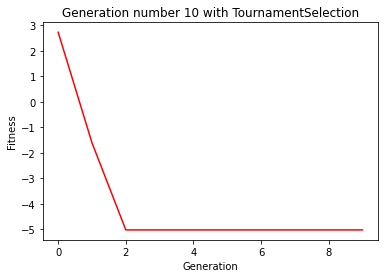

In [37]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 15
SELECTED_SIZE = 10
# NOTA: El número de descendientes está dado de manera estocástica según los operadores de variación, así que es complicado establecer un número fijo de descendientes
# sin embargo rondará los 10 individuos.
OFFSPRING_SIZE = 10 
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args = IndividualArguments(domain_1, eps_1, n_var_1, GEN_SIZE_1, Representation.GRAY)
initial_population = [Individual.newRandom(args) for _ in range(POPULATION_SIZE)]

# PIPELINE GA TOURNAMENT SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=3),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


#### Evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).

In [38]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Tournament Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Tournament Selection
 x* = [-2.9589442815249267], f(x*) = -5.0196248576606095


Generación: 1, número de descendientes: 8, intensidad: -0.522865974841334
Generación: 2, número de descendientes: 11, intensidad: -0.11178028201606968
Generación: 3, número de descendientes: 8, intensidad: -0.5295315848747928
Generación: 4, número de descendientes: 10, intensidad: -0.43432761531039804
Generación: 5, número de descendientes: 8, intensidad: -0.3427444398943285
Generación: 6, número de descendientes: 8, intensidad: 0.5528785452787626
Generación: 7, número de descendientes: 10, intensidad: 0.0
Generación: 8, número de descendientes: 7, intensidad: -1.88663373473793
Generación: 9, número de descendientes: 9, intensidad: 0.333333333333345
Generación: 10, número de descendientes: 9, intensidad: 1466595434065546.5


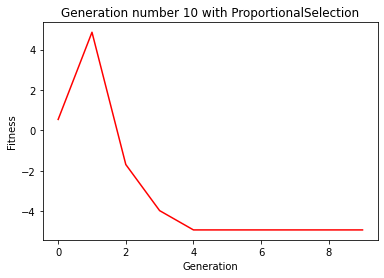

In [39]:
# PIPELINE GA PROPORTIONAL SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [40]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Proportional Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Proportional Selection
 x* = [-2.866080156402737], f(x*) = -4.917261898830159


Generación: 1, número de descendientes: 10, intensidad: -0.49475143606453986
Generación: 2, número de descendientes: 8, intensidad: -0.9387029493675791
Generación: 3, número de descendientes: 10, intensidad: -1.0316134861147301
Generación: 4, número de descendientes: 8, intensidad: -0.33601684801430926
Generación: 5, número de descendientes: 10, intensidad: 0.0
Generación: 6, número de descendientes: 8, intensidad: 0.0
Generación: 7, número de descendientes: 10, intensidad: 0.0
Generación: 8, número de descendientes: 6, intensidad: 0.0
Generación: 9, número de descendientes: 10, intensidad: 0.0
Generación: 10, número de descendientes: 8, intensidad: 0.0


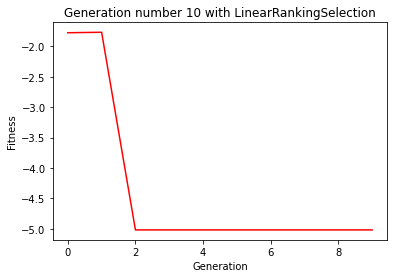

In [41]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [42]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Linear Ranking Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Linear Ranking Selection
 x* = [-2.9589442815249267], f(x*) = -5.0196248576606095


Generación: 1, número de descendientes: 6, intensidad: -0.16578046193387533
Generación: 2, número de descendientes: 10, intensidad: 0.597371365766196
Generación: 3, número de descendientes: 10, intensidad: -0.5186498456692287
Generación: 4, número de descendientes: 10, intensidad: -0.014501805145633605
Generación: 5, número de descendientes: 7, intensidad: -0.2085378867462274
Generación: 6, número de descendientes: 10, intensidad: 0.39005592771531383
Generación: 7, número de descendientes: 7, intensidad: 0.2664564679707188
Generación: 8, número de descendientes: 10, intensidad: 0.23855459010342558
Generación: 9, número de descendientes: 6, intensidad: -0.022838939226462036
Generación: 10, número de descendientes: 10, intensidad: -0.3654262312637006


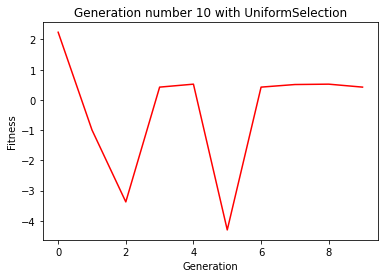

In [43]:
# PIPELINE GA UNIFORM SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=UniformSelection(num_individuals=SELECTED_SIZE),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [44]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Uniform Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Uniform Selection
 x* = [-3.188660801564027], f(x*) = -4.300359776707989


Generación: 1, número de descendientes: 8, intensidad: -0.42578795309733075
Generación: 2, número de descendientes: 10, intensidad: -0.3680943247031271
Generación: 3, número de descendientes: 11, intensidad: -0.7723687193139862
Generación: 4, número de descendientes: 8, intensidad: -0.33763555889950697
Generación: 5, número de descendientes: 6, intensidad: -0.816496580927726
Generación: 6, número de descendientes: 10, intensidad: 0.0
Generación: 7, número de descendientes: 8, intensidad: 0.0
Generación: 8, número de descendientes: 10, intensidad: 0.0
Generación: 9, número de descendientes: 10, intensidad: 0.0
Generación: 10, número de descendientes: 6, intensidad: 0.0


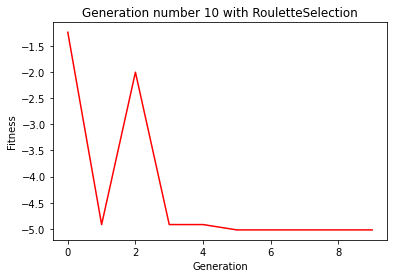

In [45]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [46]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Roulette Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Roulette Selection
 x* = [-2.9589442815249267], f(x*) = -5.0196248576606095


#### b) Para el segundo caso (ecuación 2) considerar la representación Gray, una población inicial 20 individuos del cual debe seleccionar 15 padres y crear 15 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 20 individuos)

Generación: 1, número de descendientes: 12, intensidad: -1.3552915380719688
Generación: 2, número de descendientes: 14, intensidad: -1.1075005549777217
Generación: 3, número de descendientes: 15, intensidad: -1.0611067254904418
Generación: 4, número de descendientes: 14, intensidad: 0.0
Generación: 5, número de descendientes: 12, intensidad: 0.0
Generación: 6, número de descendientes: 8, intensidad: 0.0
Generación: 7, número de descendientes: 12, intensidad: 0.0
Generación: 8, número de descendientes: 10, intensidad: 0.0
Generación: 9, número de descendientes: 8, intensidad: 0.0
Generación: 10, número de descendientes: 10, intensidad: 0.0


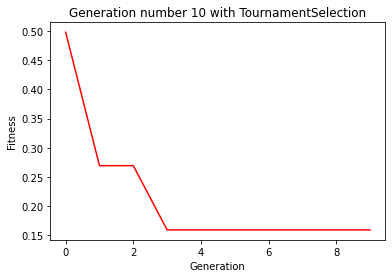

In [47]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 20
SELECTED_SIZE = 15
OFFSPRING_SIZE = 15
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, Representation.GRAY)
initial_population = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]

# PIPELINE GA
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))



In [48]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")

Optimal value
 x* = [0.29032258064516125, 0.032258064516129004], f(x*) = 0.15930427014174514


#### Evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).


Generación: 1, número de descendientes: 12, intensidad: 0.07796255143036658
Generación: 2, número de descendientes: 10, intensidad: 0.10701022220679403
Generación: 3, número de descendientes: 10, intensidad: 0.4496367104156026
Generación: 4, número de descendientes: 14, intensidad: 0.22344375048432055
Generación: 5, número de descendientes: 11, intensidad: 0.16043134824140123
Generación: 6, número de descendientes: 10, intensidad: -0.5178523046165584
Generación: 7, número de descendientes: 12, intensidad: -0.38486313915104103
Generación: 8, número de descendientes: 8, intensidad: -0.19106490581111793
Generación: 9, número de descendientes: 10, intensidad: -0.12969675850061602
Generación: 10, número de descendientes: 14, intensidad: 0.023318497421189105


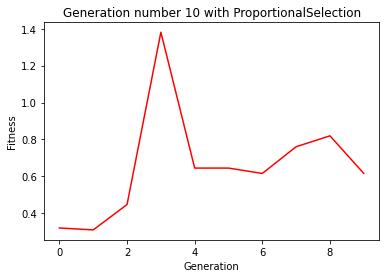

In [49]:
# PIPELINE GA PROPORTIONAL SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [50]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Proportional Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")

Optimal value with Proportional Selection
 x* = [0.35483870967741926, 0.4193548387096775], f(x*) = 0.310001558755627


Generación: 1, número de descendientes: 8, intensidad: -0.6076559054007099
Generación: 2, número de descendientes: 10, intensidad: -0.7634629545988288
Generación: 3, número de descendientes: 12, intensidad: -0.7100609358046167
Generación: 4, número de descendientes: 12, intensidad: -0.565102744839984
Generación: 5, número de descendientes: 14, intensidad: -0.7758133345466373
Generación: 6, número de descendientes: 12, intensidad: -0.2672612419124242
Generación: 7, número de descendientes: 10, intensidad: 0.0
Generación: 8, número de descendientes: 14, intensidad: 0.0
Generación: 9, número de descendientes: 9, intensidad: 0.0
Generación: 10, número de descendientes: 10, intensidad: 0.0


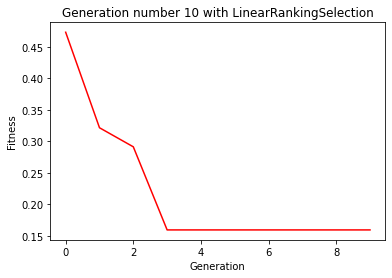

In [51]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [52]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Linear Ranking Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")

Optimal value with Linear Ranking Selection
 x* = [-0.29032258064516125, 0.032258064516129004], f(x*) = 0.15930427014174514


Generación: 1, número de descendientes: 10, intensidad: 0.027535459169862053
Generación: 2, número de descendientes: 12, intensidad: 0.08269783230640865
Generación: 3, número de descendientes: 12, intensidad: -0.4880645586807972
Generación: 4, número de descendientes: 12, intensidad: 0.31283425688532673
Generación: 5, número de descendientes: 10, intensidad: -0.16497251646776853
Generación: 6, número de descendientes: 10, intensidad: -0.3663369395406257
Generación: 7, número de descendientes: 8, intensidad: 0.33146804042814687
Generación: 8, número de descendientes: 11, intensidad: -0.036985469081771055
Generación: 9, número de descendientes: 8, intensidad: -0.031801068225868596
Generación: 10, número de descendientes: 10, intensidad: 0.0667135150972686


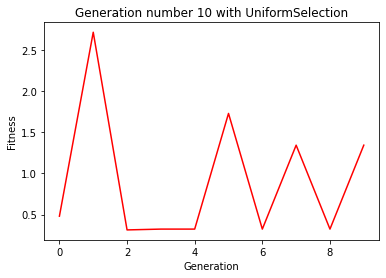

In [53]:
# PIPELINE GA UNIFORM SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=UniformSelection(num_individuals=SELECTED_SIZE),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [54]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Uniform Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")


Optimal value with Uniform Selection
 x* = [0.35483870967741926, 0.09677419354838701], f(x*) = 0.14657226137383284


Generación: 1, número de descendientes: 13, intensidad: -0.5337109223801707
Generación: 2, número de descendientes: 10, intensidad: -0.7936822968472798
Generación: 3, número de descendientes: 14, intensidad: -0.7605472512171513
Generación: 4, número de descendientes: 4, intensidad: -0.48123537073556416
Generación: 5, número de descendientes: 12, intensidad: -0.6030226891555274
Generación: 6, número de descendientes: 14, intensidad: 0.0
Generación: 7, número de descendientes: 10, intensidad: 0.0
Generación: 8, número de descendientes: 15, intensidad: 0.0
Generación: 9, número de descendientes: 10, intensidad: 0.0
Generación: 10, número de descendientes: 8, intensidad: 0.0


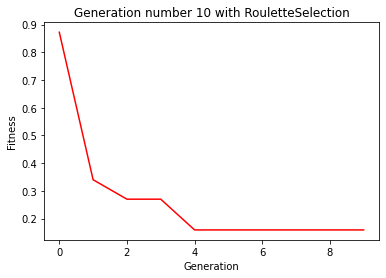

In [55]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [56]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Roulette Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")


Optimal value with Roulette Selection
 x* = [0.29032258064516125, 0.032258064516129004], f(x*) = 0.15930427014174514


#### c) Para el tercer caso (ecuación 3) considerar la representación real, una población inicial 20 individuos del cual debe seleccionar 15 padres y crear 15 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 20 individuos)

Generación: 1, número de descendientes: 10, intensidad: -0.6393365959883308
Generación: 2, número de descendientes: 12, intensidad: -0.6279310533586019
Generación: 3, número de descendientes: 12, intensidad: -0.6629476237336092
Generación: 4, número de descendientes: 13, intensidad: 0.0
Generación: 5, número de descendientes: 12, intensidad: 0.0
Generación: 6, número de descendientes: 12, intensidad: 0.0
Generación: 7, número de descendientes: 12, intensidad: 0.0
Generación: 8, número de descendientes: 10, intensidad: 0.0
Generación: 9, número de descendientes: 14, intensidad: 0.0
Generación: 10, número de descendientes: 12, intensidad: 0.0


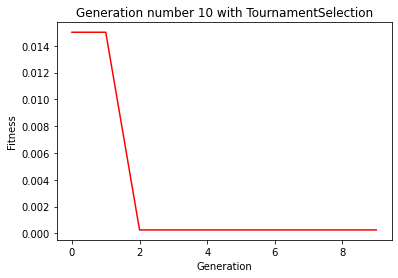

In [57]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 20
SELECTED_SIZE = 15
OFFSPRING_SIZE = 15
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args3 = IndividualArguments(domain_3, eps_3, n_var_3, GEN_SIZE_3, Representation.DECIMAL)
initial_population = [Individual.newRandom(args3) for _ in range(POPULATION_SIZE)]

# PIPELINE GA
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [58]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")

Optimal value
 x* = [13.900859, 22.0885, 43.312923, 55.214106], f(x*) = 0.00025238491374062226


#### Evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).


Generación: 1, número de descendientes: 14, intensidad: -0.19777782029976654
Generación: 2, número de descendientes: 12, intensidad: -0.2676221610508679
Generación: 3, número de descendientes: 13, intensidad: 1.022641052819197
Generación: 4, número de descendientes: 12, intensidad: -0.3506509275319442
Generación: 5, número de descendientes: 12, intensidad: -0.4829642455425128
Generación: 6, número de descendientes: 14, intensidad: -0.20953260742803856
Generación: 7, número de descendientes: 12, intensidad: 0.1390202914354438
Generación: 8, número de descendientes: 12, intensidad: 0.45902634453317886
Generación: 9, número de descendientes: 12, intensidad: 0.42563411459226486
Generación: 10, número de descendientes: 14, intensidad: -0.19840899288448224


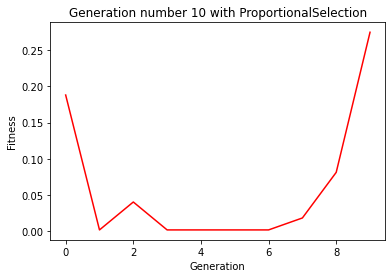

In [59]:
# PIPELINE GA PROPORTIONAL SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [60]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Proportional Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")

Optimal value with Proportional Selection
 x* = [21.630205, 20.830334, 43.312923, 55.214106], f(x*) = 0.0019469567968476865


Generación: 1, número de descendientes: 12, intensidad: -0.3070843914404433
Generación: 2, número de descendientes: 15, intensidad: -0.47457359970849383
Generación: 3, número de descendientes: 8, intensidad: -0.4085628803337299
Generación: 4, número de descendientes: 12, intensidad: -0.5231042276798622
Generación: 5, número de descendientes: 8, intensidad: -0.8217501168453327
Generación: 6, número de descendientes: 8, intensidad: -0.5982128450646755
Generación: 7, número de descendientes: 14, intensidad: -0.3922322702763676
Generación: 8, número de descendientes: 12, intensidad: -0.7537783614444088
Generación: 9, número de descendientes: 11, intensidad: -0.544331053951817
Generación: 10, número de descendientes: 10, intensidad: -0.3922322702763681


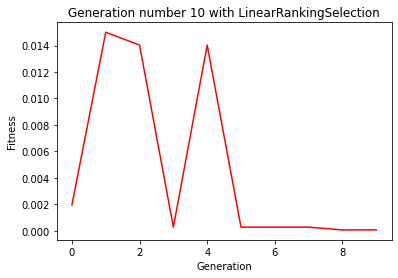

In [61]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [62]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Linear Ranking Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")

Optimal value with Linear Ranking Selection
 x* = [13.900859, 20.786648, 57.824426, 36.576454], f(x*) = 5.867060879690829e-05


Generación: 1, número de descendientes: 11, intensidad: -0.2410310261758229
Generación: 2, número de descendientes: 14, intensidad: 0.002475723665167356
Generación: 3, número de descendientes: 12, intensidad: -0.2836393444007385
Generación: 4, número de descendientes: 10, intensidad: -0.11659362590643951
Generación: 5, número de descendientes: 10, intensidad: 3.577743939341757
Generación: 6, número de descendientes: 14, intensidad: 0.611383286681751
Generación: 7, número de descendientes: 14, intensidad: -0.09486692325425305
Generación: 8, número de descendientes: 10, intensidad: 0.5967620020575783
Generación: 9, número de descendientes: 8, intensidad: -0.3713034829224692
Generación: 10, número de descendientes: 12, intensidad: -0.17493498855242592


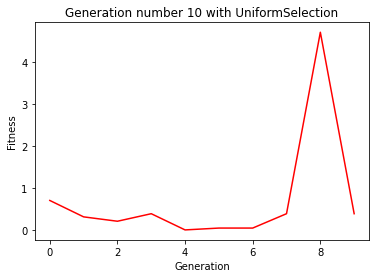

In [63]:
# PIPELINE GA UNIFORM SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=UniformSelection(num_individuals=SELECTED_SIZE),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [64]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Uniform Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")


Optimal value with Uniform Selection
 x* = [13.554475, 20.786648, 43.312923, 55.214106], f(x*) = 0.0007003743119184571


Generación: 1, número de descendientes: 12, intensidad: -0.09068971605858679
Generación: 2, número de descendientes: 6, intensidad: -0.40119810539697587
Generación: 3, número de descendientes: 12, intensidad: -0.28157508711046036
Generación: 4, número de descendientes: 10, intensidad: -0.3658017725965782
Generación: 5, número de descendientes: 14, intensidad: -0.5950760309535136
Generación: 6, número de descendientes: 10, intensidad: -0.5064363344340472
Generación: 7, número de descendientes: 12, intensidad: -1.1788012017472733
Generación: 8, número de descendientes: 12, intensidad: -0.4821449736967073
Generación: 9, número de descendientes: 14, intensidad: -0.9319297129556314
Generación: 10, número de descendientes: 12, intensidad: 0.0


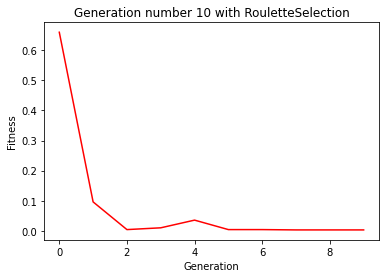

In [65]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [66]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Roulette Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")


Optimal value with Roulette Selection
 x* = [21.781961, 20.830334, 38.819399, 58.185849], f(x*) = 0.0032031299825059315
